## Predicting Personal Achievement based on Lifestyle Factors

#### ```Project Summary:```

Predict levels of Work-Life Balance based on lifestyle factors, using a dataset of 12,757 survey responses to 23 lifestyle attributes. The actual survey was given by given Authenic-Happiness.come and is linked here: http://www.authentic-happiness.com/your-life-satisfaction-score

Dataset: https://www.kaggle.com/ydalat/lifestyle-and-wellbeing-data

#### ```Initial Thoughts:```
- expect high correlation with sleep, stress, negative emotions, meditation
- curious about bmi and achievement
- does high stress = high achievement / can less stress still = high achievement?
- how does female achievement compare to male
- expect higher age to contribute to higher achievement
- possibly drop flow, lost vacation, places visited, fruit_veggies, todo_completed, sufficient income

#### ```Project Goals:```
- Create a model that will identify drivers of high personal achievement based on lifestyle factors. 
- Create a single notebook with necessary helper functions and instructions that allow a user to reproduce results on their own. 

Trello board:  https://trello.com/b/ebZrkO2D/lifestyle-factors-that-affect-personal-achievement

<a id='back'></a>
### Quick Links to Sections within this Notebook

- [Acquire Data](#AD)
- [Prepare Data](#PD)
- [Explore Data](#EX)
- [Split Data](#SD)
- [Hypothesis Testing](#HY)
- [Cluster Data](#CL)
- [Hypothesis Testing on Clusters](#HC)
- [Scale Data](#Scale)
- [Modeling](#Model)
- [Model on Test Data](#TD)
- [Conclusion](#Concl)

In [1]:
# # ignore warnings
# import warnings
# warnings.filterwarnings("ignore")

# # Wrangling
# import pandas as pd
# import numpy as np
# import wrangle
# from acquire import get_zillow_data
# # Statistical Tests
# import scipy.stats as stats

# # Visualizing
# import matplotlib.pyplot as plt
# from matplotlib import cm
# import seaborn as sns

# #Modeling Imports
# from sklearn.model_selection import learning_curve
# from sklearn.cluster import KMeans, dbscan
# from sklearn.model_selection import train_test_split
# from sklearn.linear_model import LinearRegression
# from sklearn.feature_selection import SelectKBest, RFE, f_regression 
# from sklearn.linear_model import LinearRegression, LassoLars
# from sklearn.preprocessing import PolynomialFeatures

# # modeling methods
# from sklearn.metrics import mean_squared_error, explained_variance_score
# from sklearn.linear_model import LinearRegression, LassoLars, TweedieRegressor
# from sklearn.preprocessing import PolynomialFeatures

# pd.set_option('display.max_columns', 80)

<a id='AD'></a>
## ```Acquire & Prepare Data```
[back](#back) /  [next](#PD)

In [2]:
import pandas as pd
import acquire, prepare, explore
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy import stats

In [3]:
df = acquire.get_wellbeing_data()
df.head(1)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5


In [4]:
#How many nulls in each column?
df.isnull().sum(axis =0).sum()

0

In [5]:
#How many nulls in each row?
df.isnull().sum(axis =1).sum()



0

In [6]:
df.columns

Index(['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED',
       'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT',
       'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS',
       'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING',
       'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION',
       'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE'],
      dtype='object')

In [7]:
# New dataframe 
df.groupby('PERSONAL_AWARDS')['SLEEP_HOURS'].value_counts()

PERSONAL_AWARDS  SLEEP_HOURS
0                7              147
                 8              128
                 6              117
                 5               55
                 9               45
                               ... 
10               4               64
                 10              61
                 2                5
                 3                2
                 1                1
Name: SLEEP_HOURS, Length: 103, dtype: int64

In [8]:
df.DAILY_STRESS.value_counts()

3         4398
2         3407
4         2960
1         2478
5         2052
0          676
1/1/00       1
Name: DAILY_STRESS, dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

<a id='PD'></a>
## ```Prepare Data```

[back](#back) |  [next](#EX)

In [10]:
index_stress = df.loc[df.DAILY_STRESS == '1/1/00'].index

In [11]:
df.drop(index_stress, inplace = True)

In [12]:
df.DAILY_STRESS.value_counts()

3    4398
2    3407
4    2960
1    2478
5    2052
0     676
Name: DAILY_STRESS, dtype: int64

In [13]:
df = prepare.prep_wellbeing(df)

In [14]:
df.head()

,stress,core_circle,support,social,achievement,donation,bmi,steps,sleep_hrs,shouts,awards,passion,meditation,age_range,is_female,balance
0,2,5,0,5,2,0,1,5,7,5,4,0,5,36 to 50,Female,609.5
1,3,3,8,10,5,2,2,5,8,2,3,2,6,36 to 50,Female,655.6
2,3,4,4,10,3,2,2,4,8,2,4,8,3,36 to 50,Female,631.6
3,3,3,10,7,2,5,2,5,5,5,5,2,0,51 or more,Female,622.7
4,1,3,10,4,2,4,2,5,7,0,8,1,5,51 or more,Female,663.9


In [15]:
df.columns

Index(['stress', 'core_circle', 'support', 'social', 'achievement', 'donation',
       'bmi', 'steps', 'sleep_hrs', 'shouts', 'awards', 'passion',
       'meditation', 'age_range', 'is_female', 'balance'],
      dtype='object')

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   stress       15971 non-null  int64  
 1   core_circle  15971 non-null  int64  
 2   support      15971 non-null  int64  
 3   social       15971 non-null  int64  
 4   achievement  15971 non-null  int64  
 5   donation     15971 non-null  int64  
 6   bmi          15971 non-null  int64  
 7   steps        15971 non-null  int64  
 8   sleep_hrs    15971 non-null  int64  
 9   shouts       15971 non-null  int64  
 10  awards       15971 non-null  int64  
 11  passion      15971 non-null  int64  
 12  meditation   15971 non-null  int64  
 13  age_range    15971 non-null  object 
 14  is_female    15971 non-null  object 
 15  balance      15971 non-null  float64
dtypes: float64(1), int64(13), object(2)
memory usage: 2.1+ MB


In [17]:
df.support.value_counts()

10    3993
5     1915
3     1835
4     1646
2     1576
6     1119
7     1053
8      917
1      883
0      740
9      294
Name: support, dtype: int64

<a id='SD'></a>
#### ```Split Data```

In [18]:
#splitting data for exploration
train, validate, test = prepare.train_validate_test_split(df, 'achievement', seed=123)

train.shape, validate.shape, test.shape

((8943, 16), (3833, 16), (3195, 16))

In [19]:
train.columns

Index(['stress', 'core_circle', 'support', 'social', 'achievement', 'donation',
       'bmi', 'steps', 'sleep_hrs', 'shouts', 'awards', 'passion',
       'meditation', 'age_range', 'is_female', 'balance'],
      dtype='object')

In [43]:
train.stress.value_counts()

3    2442
2    1891
4    1648
1    1417
5    1145
0     400
Name: stress, dtype: int64

<a id='EX'></a>
## ```Explore Data```
[back](#back) | [next](#HY)

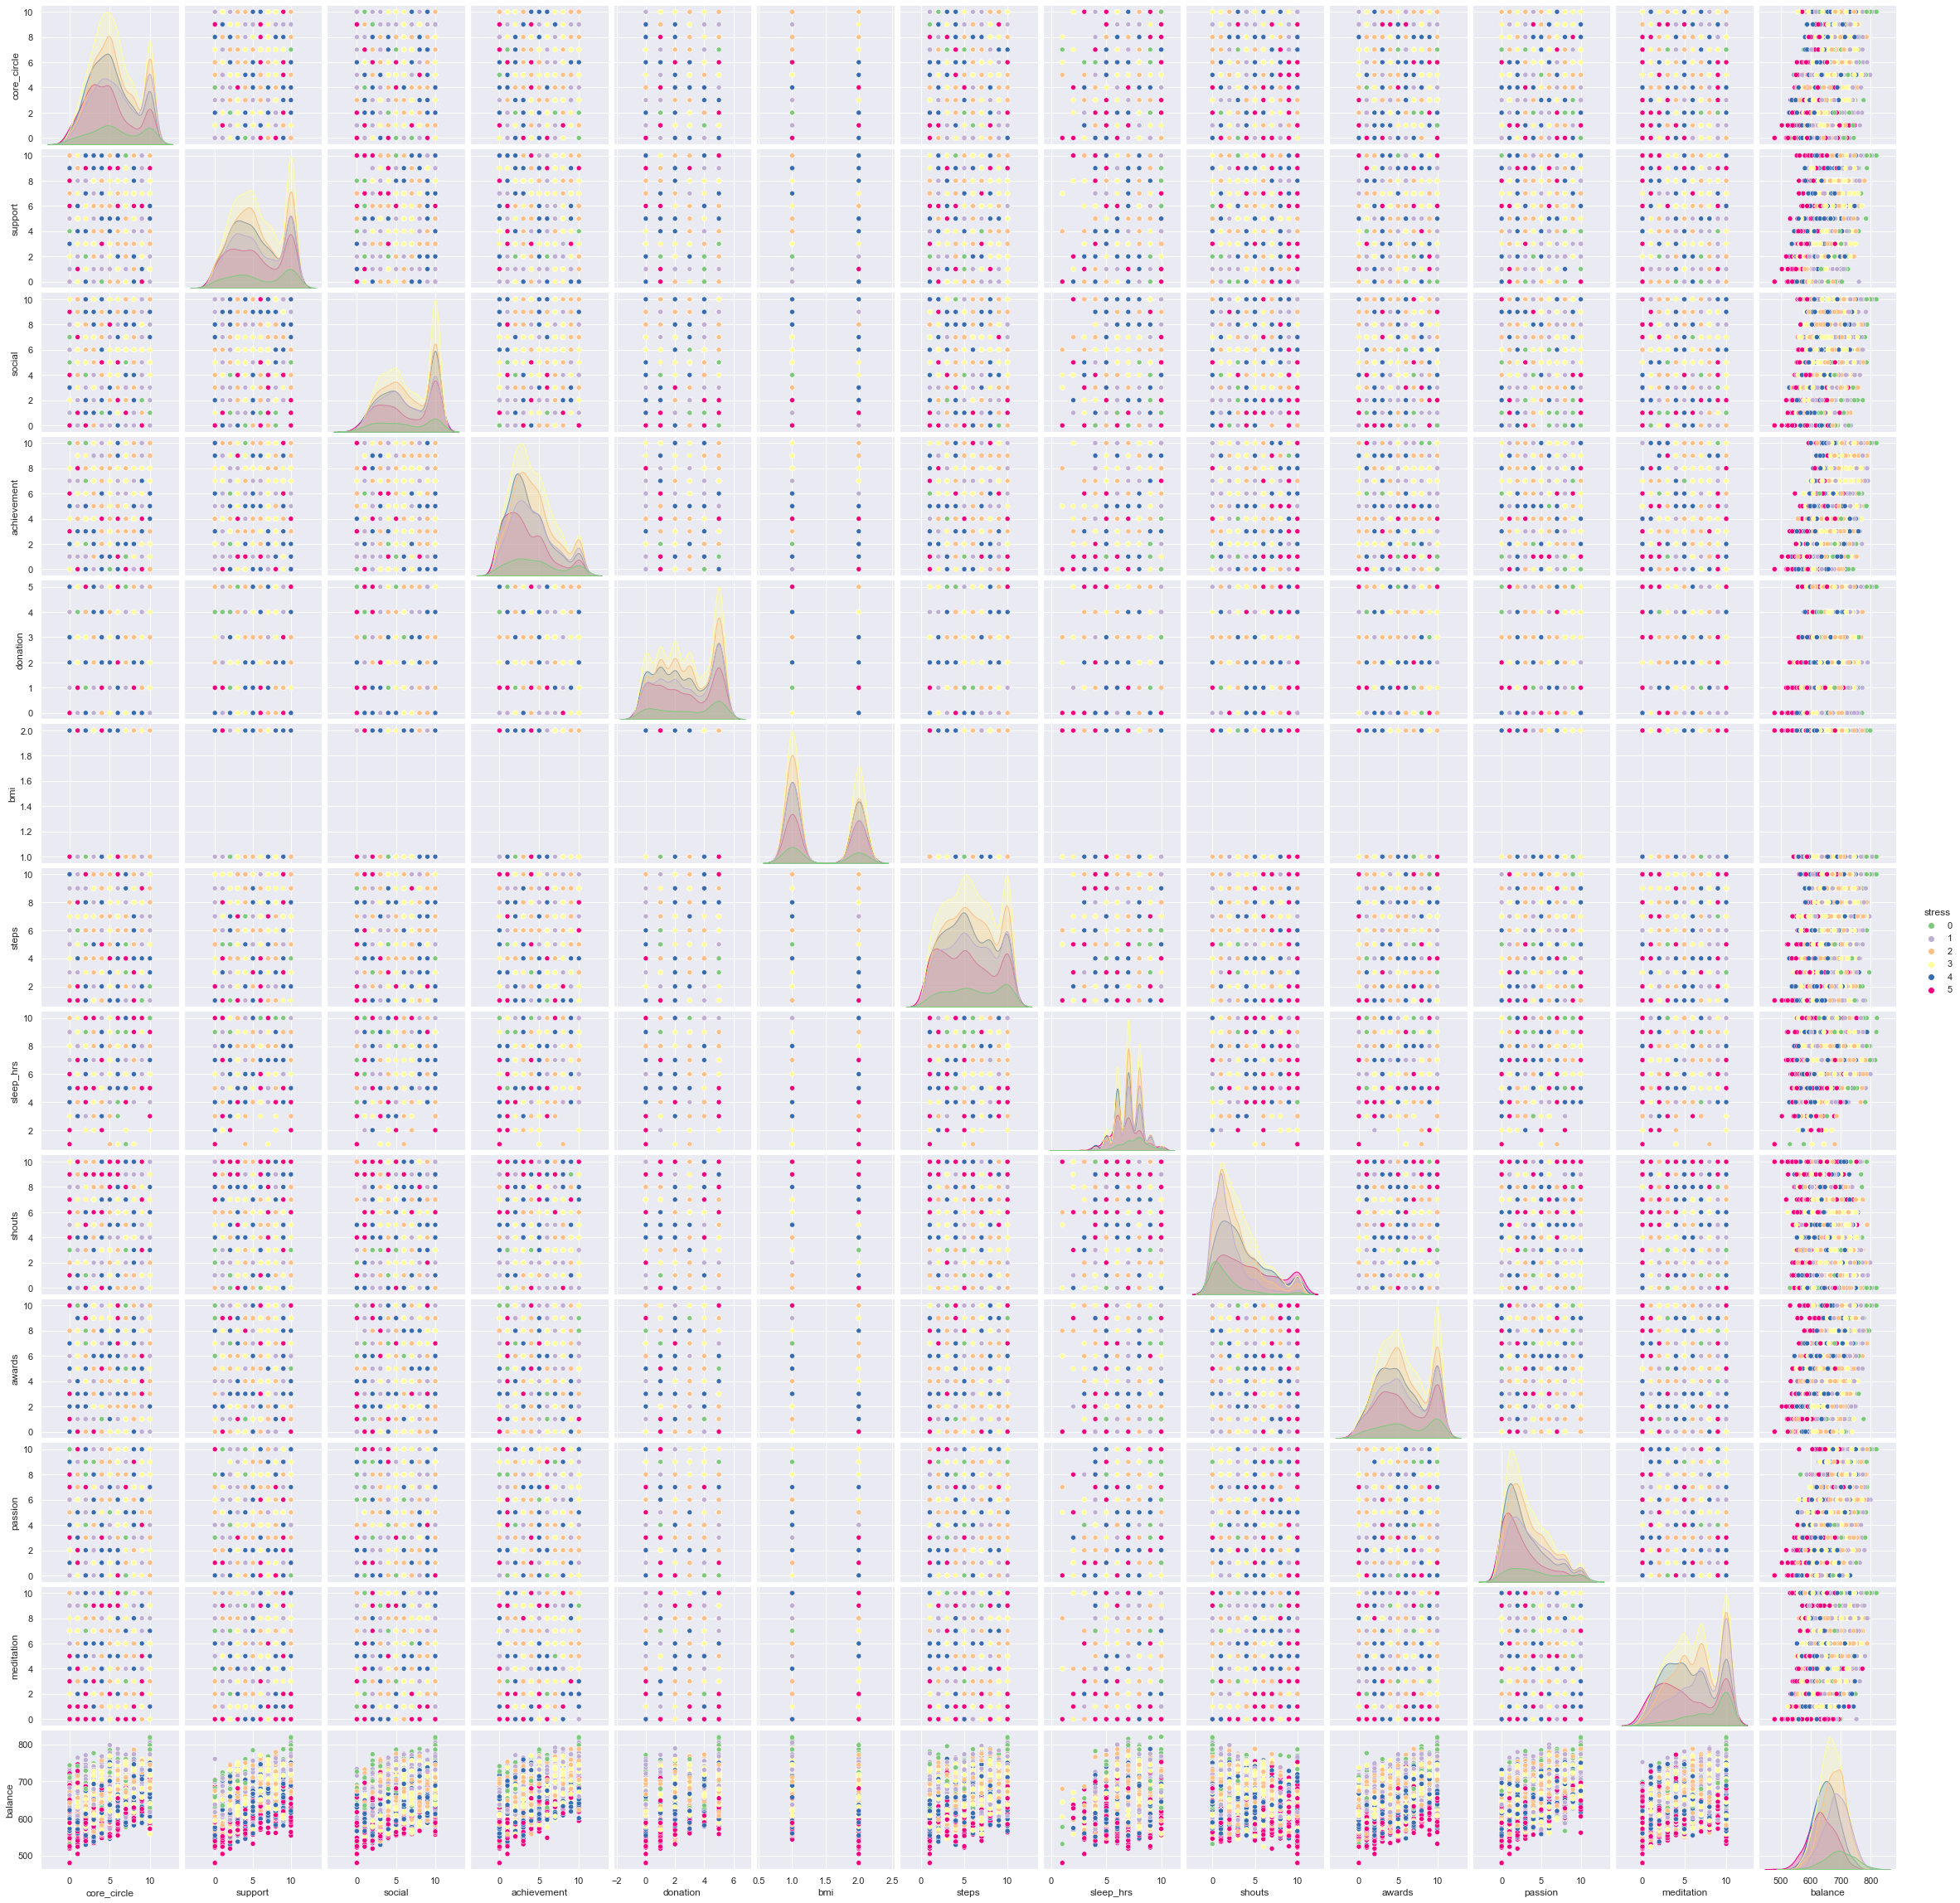

In [45]:
sns.pairplot(train, hue = 'stress', palette = 'Accent')

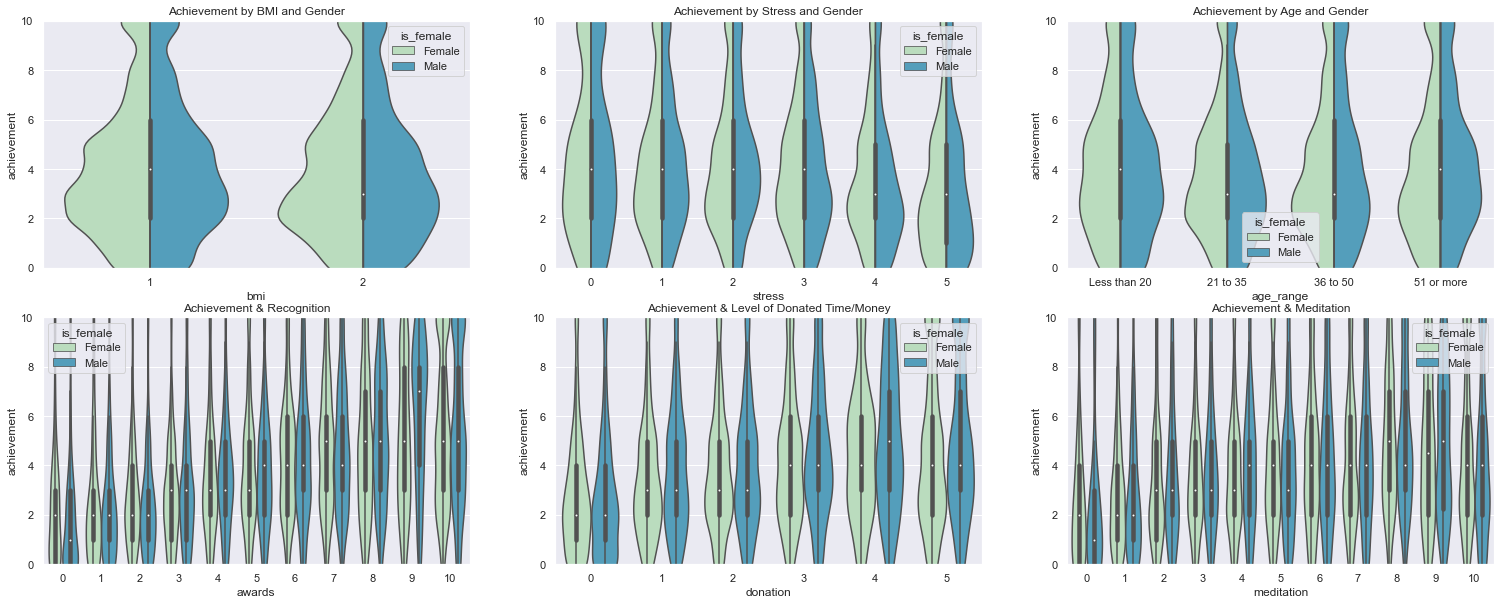

In [42]:

f.suptitle('What Lifestyle Issues Affect Achievement?', fontsize=20)

f,ax = plt.subplots(2,3,figsize=(26,10))
ax[0,0].set_title('Achievement by BMI and Gender')
ax[0,1].set_title('Achievement by Stress and Gender')
ax[0,2].set_title('Achievement by Age and Gender')
ax[1,0].set_title('Achievement & Recognition')
ax[1,1].set_title('Achievement & Level of Donated Time/Money')
ax[1,2].set_title('Achievement & Meditation')

ax[0,0].set_ylim([0, 10])
sns.set(style="darkgrid")
sns.violinplot(x= 'bmi',y='achievement', palette='GnBu', hue = 'is_female', data=train, ax = ax[0,0], 
                split = True)

ax[0,1].set_ylim([0, 10])
sns.set(style="darkgrid")
sns.violinplot(x= 'stress',y='achievement', palette='GnBu', hue = 'is_female', data=train, ax = ax[0,1], 
                 split = True)
ax[0,2].set_ylim([0, 10])
sns.violinplot(x = 'age_range', y = 'achievement', hue = 'is_female', palette='GnBu', data = train,
               order=['Less than 20', '21 to 35', '36 to 50', '51 or more'], split = True, ax = ax[0,2])
ax[1,0].set_ylim([0, 10])
sns.violinplot(x = 'awards', y = 'achievement', hue = 'is_female', palette='GnBu', data=train, ax = ax[1,0])
ax[1,1].set_ylim([0, 10])
sns.violinplot(x = 'donation', y = 'achievement',hue = 'is_female',palette='GnBu', data=train, ax = ax[1,1])
ax[1,2].set_ylim([0, 10])
sns.violinplot(x = 'meditation', y = 'achievement', hue = 'is_female', palette='GnBu', data=train, ax = ax[1,2])


plt.show()


#### ```Hypotheses:```

H${0}$: There is no relationship between daily stress levels and personal achievement.<br>
H${a}$: There is a dependent relationship between daily stress levels and personal achievement.<br>

H${0}$: There is no relationship between bmi, age and levels of personal achievement. <br>
H${a}$: There is a dependnt relationship between bmi and levels of personal achievement. <br>
H${0}$: There is no relationship between sleep and levels of personal achievement. <br>
H${a}$: There is a dependent relationship between sleep and levels of personal achievement. <br>

In [58]:
#sns.heatmap(train,cmap="YlGnBu", annot = True)

<a id='HY'></a>
## ```Hypothesis Testing - Anova```
[back](#back) | [next](#Pear)

<a id='CL'></a>
## ```Cluster Data```
[back](#back) | [next](#all)